# Python Financial Analysis for Beginners Case 2 - The efficient frontier is a concept in modern portfolio theory (MPT)

## The efficient frontier is a concept in modern portfolio theory (MPT) that represents the set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. MPT assumes that investors are rational and risk-averse, seeking to maximize returns while minimizing risk.
## MPT uses statistical measures such as variance and covariance to calculate the risk and return of different portfolios. It argues that by combining different assets with varying degrees of risk and return, investors can create a portfolio that maximizes their expected return for a given level of risk or minimizes their risk for a given level of expected return.
## The efficient frontier is derived by plotting different portfolios on a graph, with expected return on the y-axis and risk (usually measured by standard deviation) on the x-axis. The efficient frontier represents the set of portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return.
## Investors can use the efficient frontier to find their optimal portfolio by selecting a point on the frontier that matches their desired level of risk and return. This approach is widely used by investors, financial advisors, and fund managers to design and manage investment portfolios


**The selected ETFs + Bitcoin are:**


**VTI** - US Stock Market [](https://investor.vanguard.com/investment-products/etfs/profile/vti)

**VXUS** - International Stock ETF (exUS) [](https://investor.vanguard.com/investment-products/etfs/profile/vxus)

**BND** - Total Bond Market [](https://investor.vanguard.com/investment-products/etfs/profile/bnd)

## **BTC** - Bitcoin in USD


## Step 1: Import the required libraries

In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Step 2: Load the data into a pandas DataFrame

In [35]:
# Load the data from a CSV file
data = pd.read_csv('./monthly_returns.csv', index_col='Date')
data

,VTI,VXUS,BND,BTC
Date,,,,
2013-01-31,0.054176,0.024007,-0.006902,0.510733
2013-02-28,0.012816,-0.011411,0.005366,0.635473
2013-03-31,0.039456,0.009337,0.000787,1.711204
2013-04-30,0.016057,0.035022,0.010152,0.477901
2013-05-31,0.024435,-0.033029,-0.019261,-0.048972
...,...,...,...,...
2022-08-31,-0.037285,-0.044868,-0.027980,-0.151660
2022-09-30,-0.092240,-0.099076,-0.041813,-0.038201
2022-10-31,0.081128,0.034083,-0.011593,0.050477


## Step 3: Calculate the expected returns and the covariance matrix

In [36]:
# calculate annual returns of the stocks
returns_annual = data.mean() * 12

# get covariance of returns of the stock
cov_annual = data.cov() * 12

In [37]:
(round(returns_annual * 100,2))

VTI      12.60
VXUS      4.98
BND       1.09
BTC     139.90
dtype: float64

## Step 4: Simulate 10,000 portfolios with random weights and get the Return, Volatility and Sharpe ratio

In [38]:
np.random.seed(42)
num_portfolios = 10000
num_assets = len(data.columns)
stock_weights = np.zeros((num_portfolios, num_assets))
port_returns = np.zeros(num_portfolios)
port_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for x in range(num_portfolios):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    stock_weights[x,:] = weights
    
    # Expected return
    port_returns[x] = np.dot(weights, returns_annual)
    
    # Expected volatility
    port_volatility[x] = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    # Sharpe Ratio
    sharpe_ratio[x] = port_returns[x]/port_volatility[x]

In [39]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [40]:
for counter,symbol in enumerate(data):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in data]

# reorder dataframe columns
df = df[column_order]
df.head(10)

,Returns,Volatility,Sharpe Ratio,VTI Weight,VXUS Weight,BND Weight,BTC Weight
0,0.353935,0.406417,0.870865,0.141022,0.357962,0.275610,0.225406
1,1.002904,1.212811,0.826925,0.126201,0.126181,0.046983,0.700635
2,0.638412,0.743489,0.858670,0.261391,0.307900,0.008951,0.421758
3,0.265255,0.267277,0.992435,0.590380,0.150594,0.128953,0.130073
4,0.307046,0.345037,0.889895,0.196011,0.338079,0.278284,0.187627
5,0.425403,0.469189,0.906679,0.433983,0.098942,0.207216,0.259858
6,0.418458,0.475827,0.879433,0.233265,0.401593,0.102127,0.263015
7,0.227335,0.233131,0.975138,0.418096,0.032782,0.428774,0.120347
8,0.429311,0.510381,0.841159,0.023333,0.340350,0.346357,0.289959
9,0.436547,0.506813,0.861356,0.199528,0.063977,0.448186,0.288309


## Step 5: select the portfolios with 1) Min Volatility, 2) Max Sharpe Ratio and 3) Max Return 

In [41]:
# select the portfolios with 1) Min Volatility, 2) Max Sharpe Ratio and 3) Max Return 
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_return = df['Returns'].max()

# use the min, max values to locate and create portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_return_port = df.loc[df['Returns'] == max_return]

## Step 6: Plot the efficient frontier with all simulated portfolios

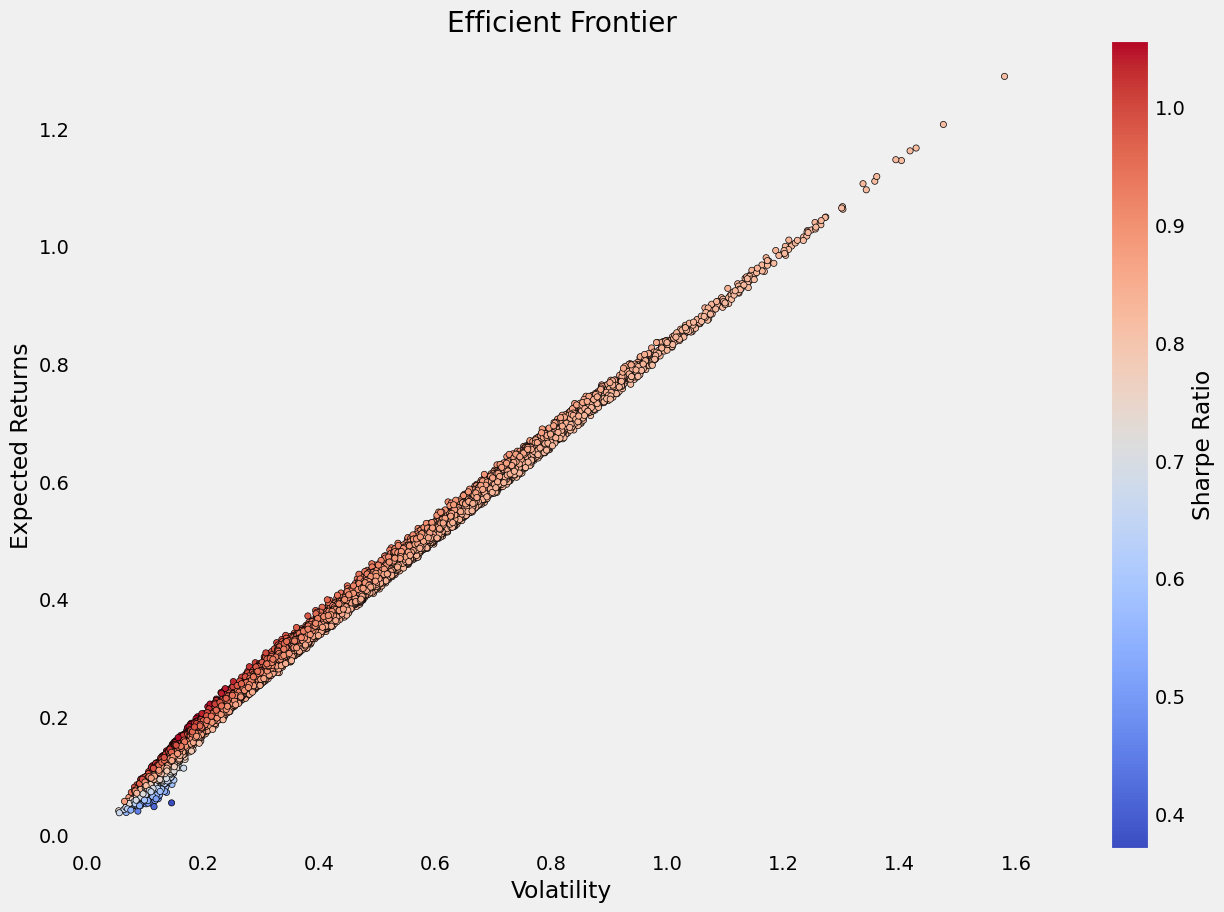

In [42]:
# plot the efficient frontier with all simulated portfolios
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='coolwarm', edgecolors='black', figsize=(14, 10), grid=False)
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

## Step 7: Plot the efficient frontier with all simulated portfolios, but idenfity the min vol portfolio and max sharpe portfolio

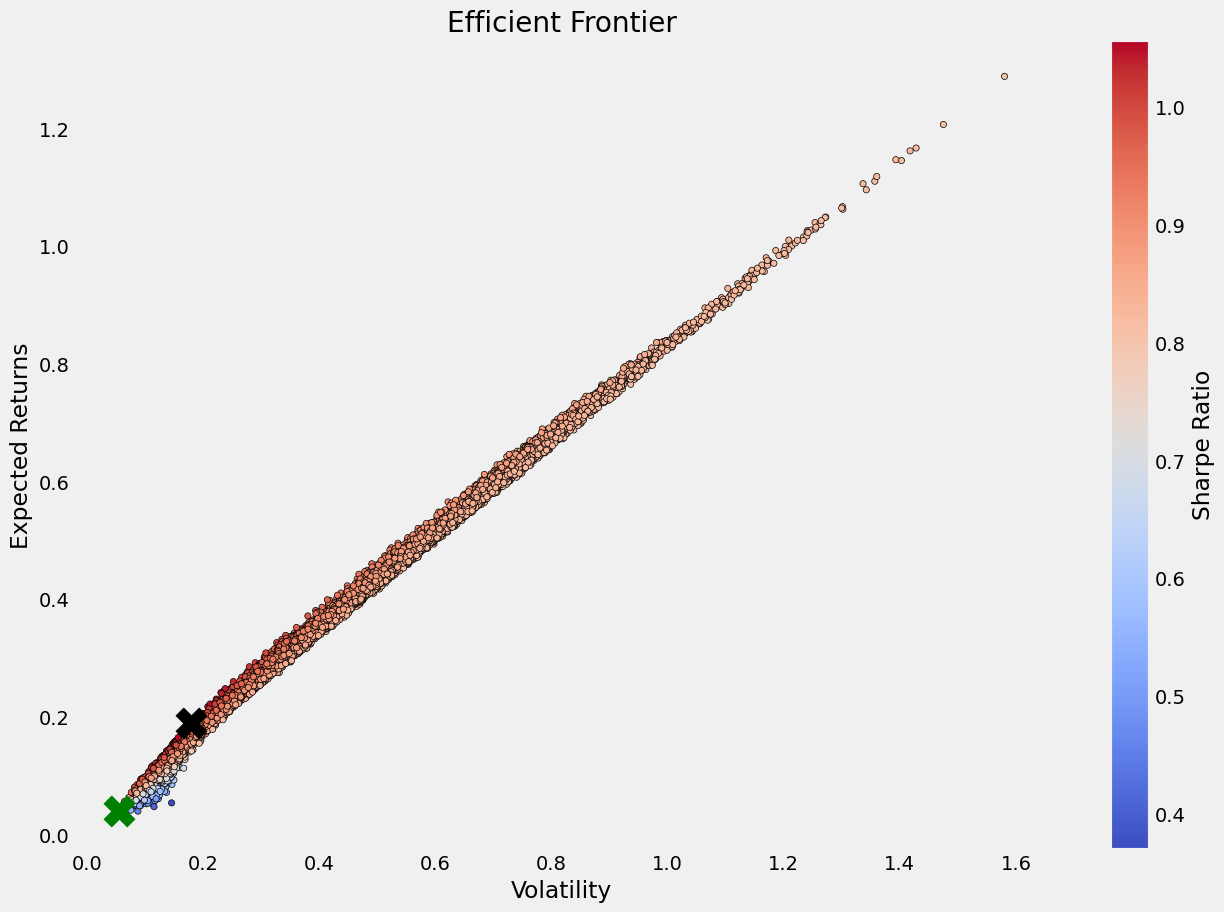

In [43]:
# plot the efficient frontier with all simulated portfolios, but  idenfity the min vol portfolio and max sharpe portfolio
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='coolwarm', edgecolors='black', figsize=(14, 10), grid=False)
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

# use the min, max values to locate and create the two special portfolios
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='black', marker='X', s=500)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='green', marker='X', s=500 )

plt.show()


## Findings

### Portfolio with minimun volatitily 

As you can see, the portfolio has ~ 80% weight to BND the low-risk bond ETF and very small allocation to Bitcoin the high-risk asset 

In [44]:
pd.melt((df[df["Volatility"] == df['Volatility'].min()]))

,variable,value
0,Returns,0.040167
1,Volatility,0.053843
2,Sharpe Ratio,0.745992
3,VTI Weight,0.157639
4,VXUS Weight,0.025394
5,BND Weight,0.809645
6,BTC Weight,0.007322


### Portfolio with minimun volatitily 

With ~ 18% Annual Return, and Annual Volatility of 17.9%, the portfolio with the highest Sharpe Ratio is mostly allocated to VTI 70% and BND 22% , but it has a meaningful allocation to Bitcoin of 7%

In [45]:
pd.melt((df[df["Sharpe Ratio"] == df['Sharpe Ratio'].max()]))

,variable,value
0,Returns,0.188845
1,Volatility,0.178606
2,Sharpe Ratio,1.057329
3,VTI Weight,0.693170
4,VXUS Weight,0.018069
5,BND Weight,0.218539
6,BTC Weight,0.070221


### For reference only show the Portfolio with max Sharpe Ratio

With ~ 120% Annual Return, and Annual Volatility of 148%, the portfolio with the highest Sharpe ratio is mostly allocated to Bitcoin 85% and VXUS 9.7%.

In [46]:
pd.melt((df[df["Returns"] == df['Returns'].max()]))

,variable,value
0,Returns,1.288235
1,Volatility,1.580418
2,Sharpe Ratio,0.815123
3,VTI Weight,0.029679
4,VXUS Weight,0.019757
5,BND Weight,0.033395
6,BTC Weight,0.917169


### For reference only show the Yearly Returns for each ETF and Bitcoin

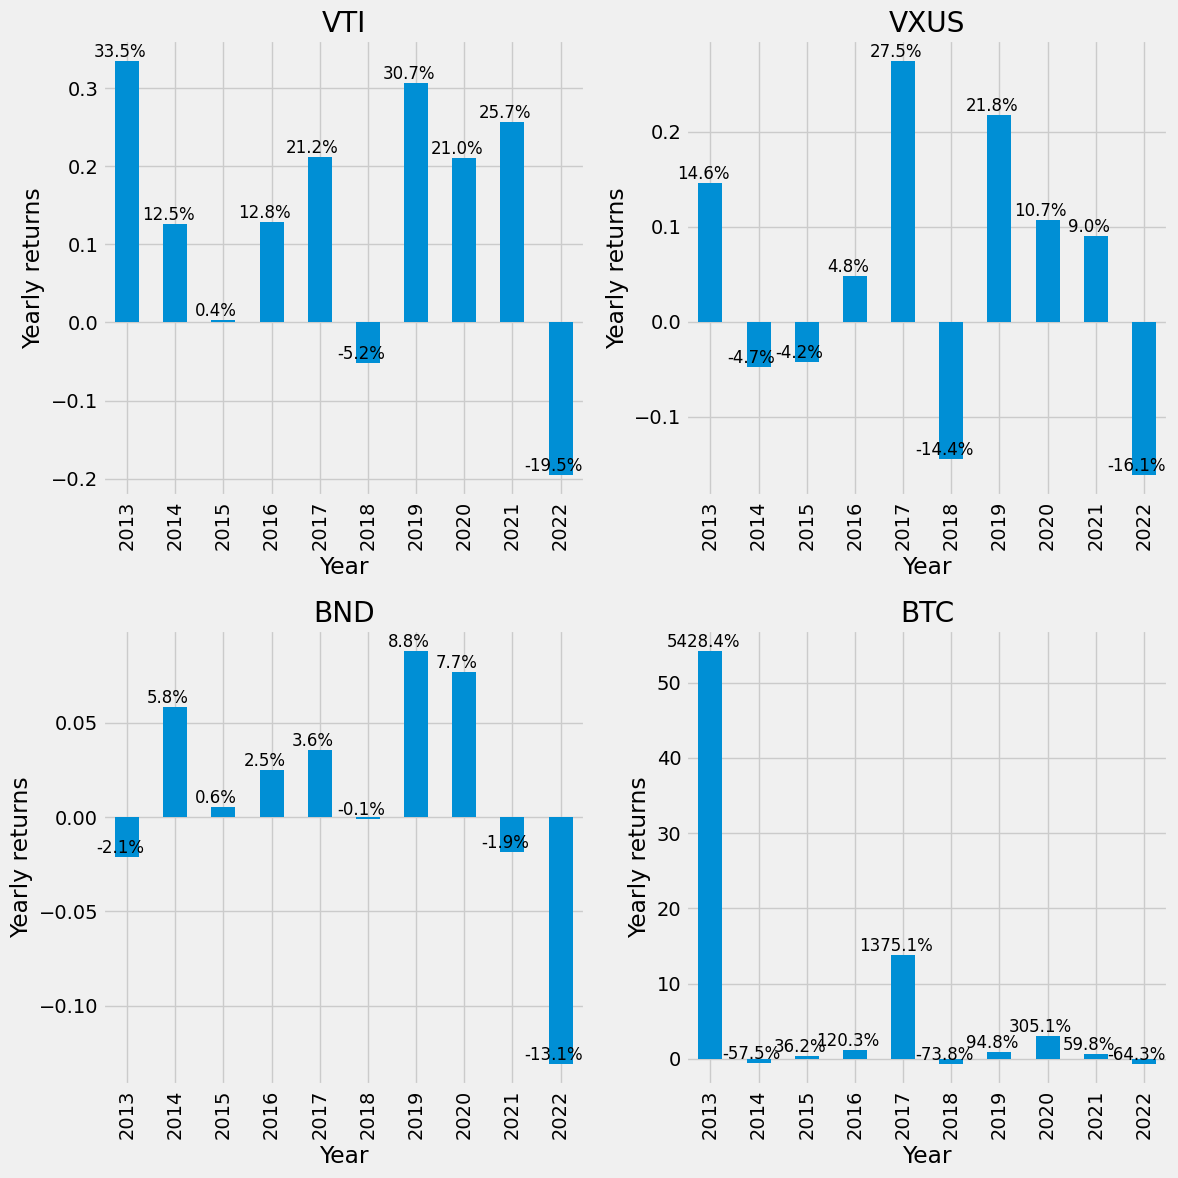

In [47]:
# Load the data from a CSV file
data = pd.read_csv('./monthly_returns.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

# calculate yearly returns
yearly_returns = data.resample('Y').apply(lambda x: ((x + 1).cumprod() - 1).last("M"))

# plot yearly returns in a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

for i, (name, series) in enumerate(yearly_returns.iteritems()):
    ax = axes[i // 2, i % 2]
    series.plot(kind='bar', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Yearly returns')
    x_tick_labels = [item.get_text()[:4] for item in ax.get_xticklabels()]
    ax.set_xticklabels(x_tick_labels)
    for patch in ax.patches:
        x = patch.get_x() + patch.get_width() / 5
        y = patch.get_y() + patch.get_height()
        label = '{:.1f}%'.format(patch.get_height() * 100)
        ax.annotate(label, (x, y), ha='center', va='bottom',fontsize=12)

fig.tight_layout()

# show the chart
plt.show()
